In [191]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import RandomForestClassifier

#%matplotlib qt
np.random.seed(seed = 25)

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [192]:
# create 2 gaussians

normal1_mean = [-2, -2]
normal1_cov = [[1, 0], [0, 1]]
num_normal1_samples = 10
normal1 = np.random.multivariate_normal(mean=normal1_mean, cov=normal1_cov, size=num_normal1_samples)

normal2_mean = [2,2]
normal2_cov = [[1, 0], [0, 1]]
num_normal2_samples = 10
normal2 = np.random.multivariate_normal(mean=normal2_mean, cov=normal2_cov, size=num_normal2_samples)


In [193]:
# create a fully labeled dataset (for Part I)
X = np.concatenate((normal1,normal2),axis = 0)
print(X.shape)
print(X)
y = np.array(num_normal1_samples*[1])
y = np.concatenate((y,np.array(num_normal2_samples*[2])))
print(y.shape)
print(y)

(20, 2)
[[-1.77172691 -0.9731097 ]
 [-2.83958485 -2.59118152]
 [-2.9568883  -2.22232569]
 [-2.61991511 -0.16209542]
 [-4.05323076 -1.13141695]
 [-2.92073444 -2.23231186]
 [ 0.1529569  -3.33466147]
 [-1.92362035 -3.24608928]
 [-0.79772769 -3.04994158]
 [-0.94338989 -2.41967767]
 [ 4.29484234 -0.59448738]
 [ 4.8227564   2.68088892]
 [ 0.42230655  0.02374641]
 [ 2.53333982  1.70913029]
 [ 1.48648033  3.98262608]
 [ 2.22600105  0.16009504]
 [ 3.60767083  2.38829194]
 [ 2.39973206  2.4054766 ]
 [ 2.21700177  1.3665609 ]
 [ 2.24662153  0.06045448]]
(20,)
[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


In [194]:
num_labeled_pts_per_cluster = 1
# create labeled y array
y_L = np.array(num_labeled_pts_per_cluster*[1])
y_L = np.concatenate((y_L,np.array(num_labeled_pts_per_cluster*[2])),axis = 0)
print(y_L)

# create labeled X array
# select points from each gaussian to be labeled points
rng = np.random.default_rng()
rand_inds_1 = rng.choice(num_normal1_samples, num_labeled_pts_per_cluster, replace=False)
X_L = normal1[rand_inds_1,:]
rand_inds_2 = rng.choice(num_normal2_samples, num_labeled_pts_per_cluster, replace=False)
X_L = np.concatenate((X_L,normal2[rand_inds_2,:]))
print(X_L)

# create unlabeled array
X_U = normal1.copy()
X_U = np.delete(X_U,rand_inds_1,axis = 0)
X_temp = normal2.copy()
X_temp = np.delete(X_temp,rand_inds_2,axis = 0)
X_U = np.concatenate((X_U,X_temp),axis = 0)
print(X_U.shape)

[1 2]
[[-4.05323076 -1.13141695]
 [ 2.24662153  0.06045448]]
(18, 2)


In [195]:
print(f'{X=}')
print(f'{X_L=}')
print(f'{X_U=}')


X=array([[-1.77172691, -0.9731097 ],
       [-2.83958485, -2.59118152],
       [-2.9568883 , -2.22232569],
       [-2.61991511, -0.16209542],
       [-4.05323076, -1.13141695],
       [-2.92073444, -2.23231186],
       [ 0.1529569 , -3.33466147],
       [-1.92362035, -3.24608928],
       [-0.79772769, -3.04994158],
       [-0.94338989, -2.41967767],
       [ 4.29484234, -0.59448738],
       [ 4.8227564 ,  2.68088892],
       [ 0.42230655,  0.02374641],
       [ 2.53333982,  1.70913029],
       [ 1.48648033,  3.98262608],
       [ 2.22600105,  0.16009504],
       [ 3.60767083,  2.38829194],
       [ 2.39973206,  2.4054766 ],
       [ 2.21700177,  1.3665609 ],
       [ 2.24662153,  0.06045448]])
X_L=array([[-4.05323076, -1.13141695],
       [ 2.24662153,  0.06045448]])
X_U=array([[-1.77172691, -0.9731097 ],
       [-2.83958485, -2.59118152],
       [-2.9568883 , -2.22232569],
       [-2.61991511, -0.16209542],
       [-2.92073444, -2.23231186],
       [ 0.1529569 , -3.33466147],
       [

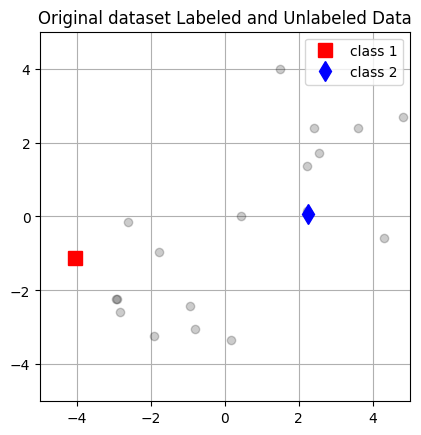

In [213]:
fig, axs = plt.subplots(1,1)

# plt.figure()
plt.plot(X_U[:,0],X_U[:,1],'ko',alpha = 0.2)

c_inds = np.where(y_L == 1)[0]
plt.plot(X_L[c_inds,0],X_L[c_inds,1],'rs',label = f'class {str(1)}',markersize = 10)
c_inds = np.where(y_L == 2)[0]
plt.plot(X_L[c_inds,0],X_L[c_inds,1],'bd',label = f'class {str(2)}',markersize = 10)

axs.set(xlim=(-5, 5), ylim=(-5, 5))
axs.set_aspect('equal', 'box')
plt.title('Original dataset Labeled and Unlabeled Data')
plt.grid()
plt.legend()

pred_A=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
pred_A_probs=array([[0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.9, 0.1],
       [1. , 0. ],
       [0.7, 0.3],
       [1. , 0. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.1, 0.9],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ]])


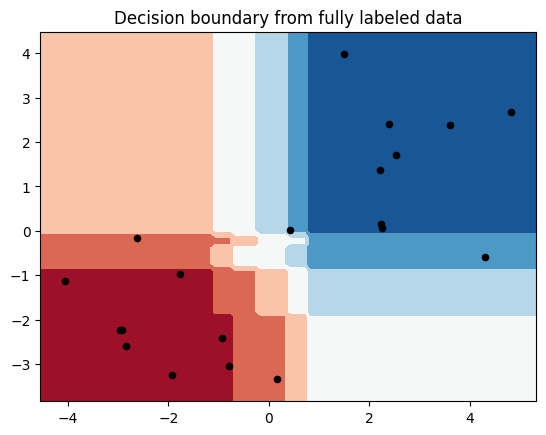

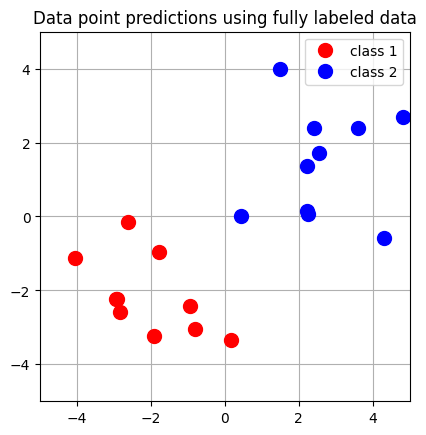

In [214]:
# Part I - Find classifier using fully labeled data (i.e. X,y)
classifier_A = RandomForestClassifier( max_depth=5, n_estimators=10, max_features=1, random_state=42 )
classifier_A.fit(X, y)
fig, ax = plt.subplots(1,1)

display = DecisionBoundaryDisplay.from_estimator(classifier_A, X, cmap=cm, ax=ax, eps=0.5)
ax.title.set_text('Decision boundary from fully labeled data')

#plot the labeled points
pred_A = classifier_A.predict(X)
pred_A_probs = classifier_A.predict_proba(X)
print(f'{pred_A=}')
print(f'{pred_A_probs=}')


ax.scatter(X[:,0], X[:, 1], c='k', s=20, edgecolors='k')

plt.show()

#make a plot without the descision boundary, instead plotting the datapoints by class
fig, ax = plt.subplots(1,1)
c_inds = np.where(y == 1)[0]
ax.plot(X[c_inds,0],X[c_inds,1],'ro',label = f'class {str(1)}',markersize = 10)
c_inds = np.where(y == 2)[0]
ax.plot(X[c_inds,0],X[c_inds,1],'bo',label = f'class {str(2)}',markersize = 10)
ax.set(xlim=(-5, 5), ylim=(-5, 5))
ax.set_aspect('equal', 'box')
plt.grid()
plt.legend()
ax.title.set_text('Data point predictions using fully labeled data')
plt.show()

pred_L=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
pred_L_probs=array([[0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.9, 0.1],
       [1. , 0. ],
       [0.7, 0.3],
       [1. , 0. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.1, 0.9],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ]])


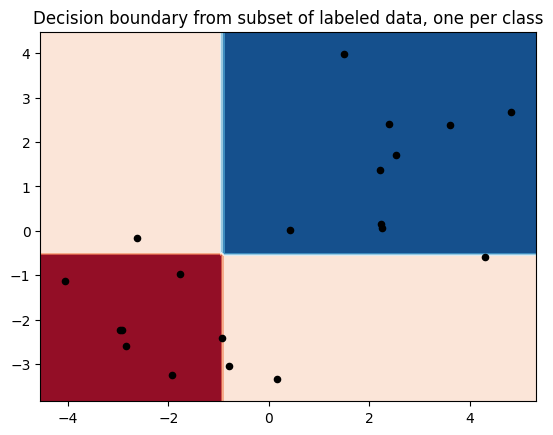

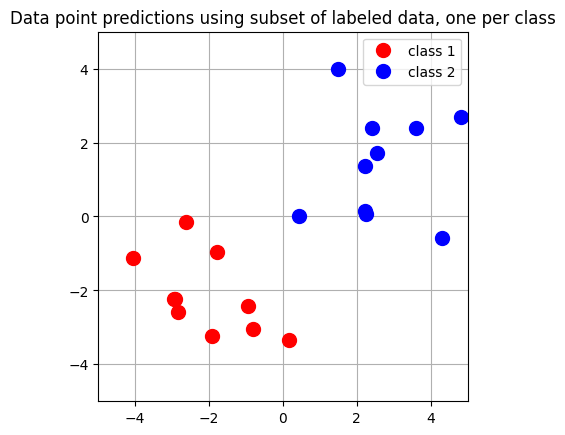

In [211]:
# Part II - Find classifier using subset of labeled data (i.e. just X_L,y_L)
classifier_L = RandomForestClassifier( max_depth=5, n_estimators=10, max_features=2, random_state=42 )
classifier_L.fit(X_L, y_L)
fig, ax = plt.subplots(1,1)

display = DecisionBoundaryDisplay.from_estimator(classifier_L, X, cmap=cm, ax=ax, eps=0.5)
ax.title.set_text('Decision boundary from subset of labeled data, one per class')
#plot the labeled points
pred_L = classifier_A.predict(X)
pred_L_probs = classifier_A.predict_proba(X)
print(f'{pred_L=}')
print(f'{pred_L_probs=}')


ax.scatter(X[:,0], X[:, 1], c='k', s=20, edgecolors='k')
plt.show()

#make a plot without the descision boundary, instead plotting the datapoints by class
fig, ax = plt.subplots(1,1)
c_inds = np.where(y == 1)[0]
ax.plot(X[c_inds,0],X[c_inds,1],'ro',label = f'class {str(1)}',markersize = 10)
c_inds = np.where(y == 2)[0]
ax.plot(X[c_inds,0],X[c_inds,1],'bo',label = f'class {str(2)}',markersize = 10)
ax.set(xlim=(-5, 5), ylim=(-5, 5))
ax.set_aspect('equal', 'box')
ax.title.set_text('Data point predictions using subset of labeled data, one per class')
plt.grid()
plt.legend()
plt.show()

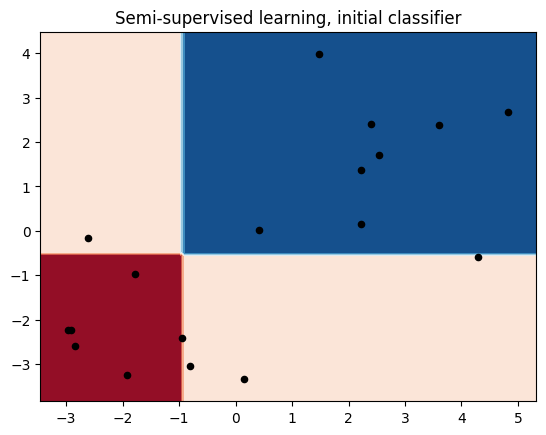

[[0.9 0.1]
 [0.9 0.1]
 [0.9 0.1]
 [0.6 0.4]
 [0.9 0.1]
 [0.6 0.4]
 [0.9 0.1]
 [0.6 0.4]
 [0.9 0.1]
 [0.6 0.4]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]]
probability_threshold = 0.85


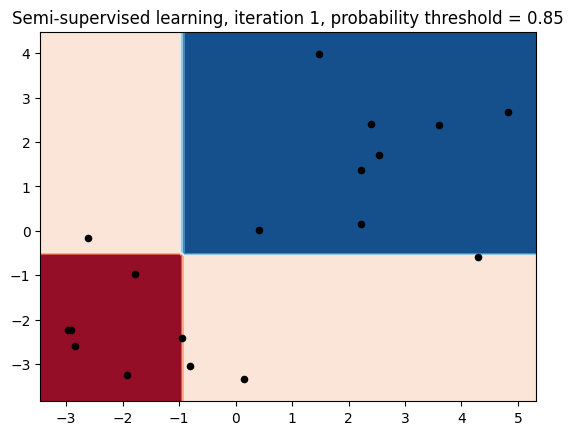

[[0.9 0.1]
 [0.9 0.1]
 [0.9 0.1]
 [0.6 0.4]
 [0.9 0.1]
 [0.6 0.4]
 [0.9 0.1]
 [0.6 0.4]
 [0.9 0.1]
 [0.6 0.4]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]]
probability_threshold = 0.7999999999999999


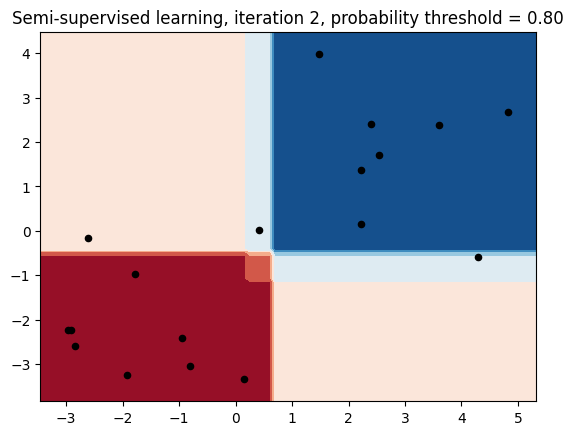

[[0.6 0.4]
 [1.  0. ]
 [1.  0. ]
 [0.5 0.5]
 [0.2 0.8]
 [0.5 0.5]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]]
probability_threshold = 0.7499999999999999


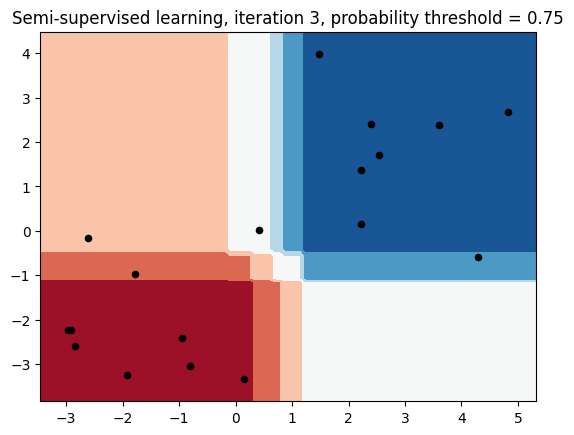

[[0.6 0.4]
 [0.2 0.8]
 [0.4 0.6]]
probability_threshold = 0.6999999999999998


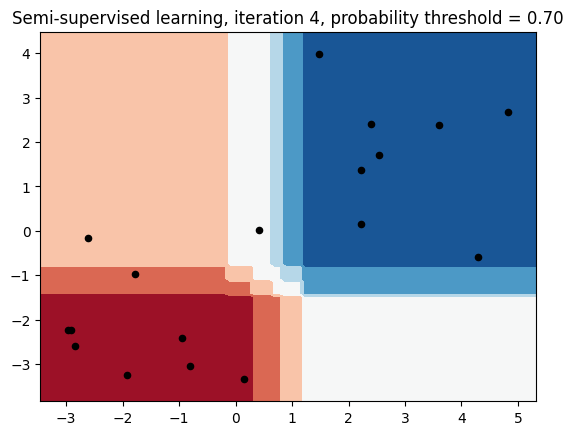

[[0.6 0.4]
 [0.4 0.6]]
probability_threshold = 0.6499999999999998


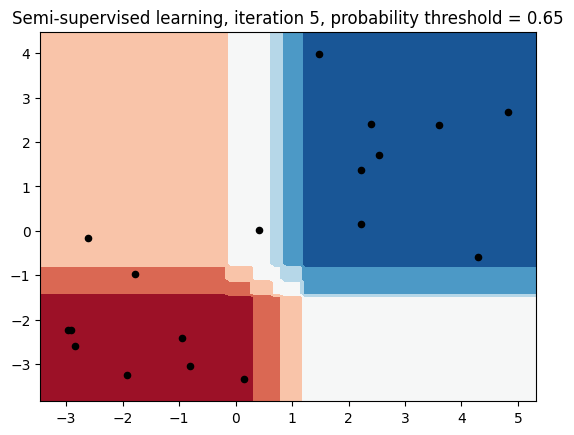

[[0.6 0.4]
 [0.4 0.6]]
probability_threshold = 0.5999999999999998


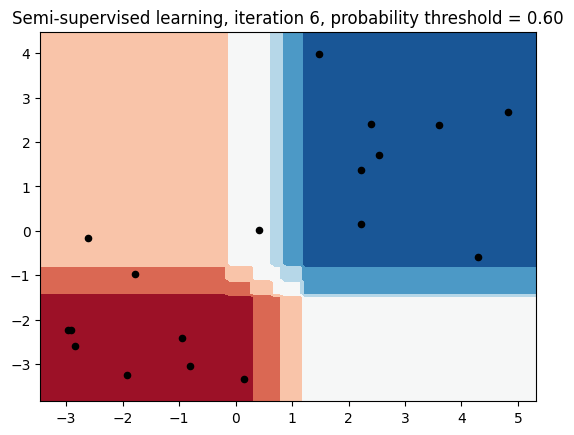

[[0.6 0.4]
 [0.4 0.6]]
probability_threshold = 0.5499999999999997


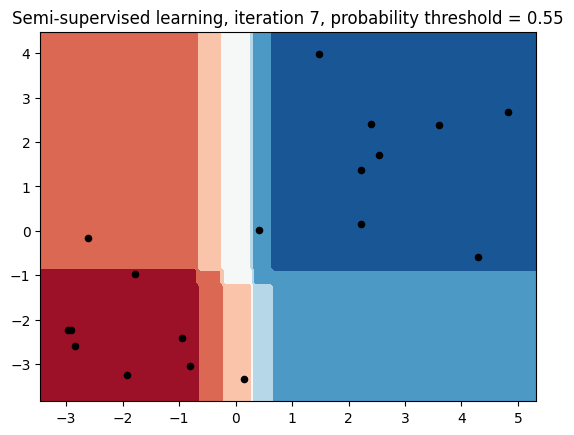

In [208]:
# Part III - Find classifier using semi-supervised wrapper method (i.e. X_L,y_L, and X_U)
start_probability_threshold = 0.9
end_probability_threshold = 0.51
probability_threshold_step = 0.05
probability_threshold = start_probability_threshold
y_pseudoL = np.copy(y_L )
X_pseudoL = np.copy(X_L)
U_pseudoL = np.copy(X_U)
U_to_delete = []

def make_plot(XpL, ypL, X, classifier, ax, cm, title):
    #plot the labeled points
    _ = DecisionBoundaryDisplay.from_estimator(classifier, X, cmap=cm, ax=ax, eps=0.5)
    #pred_PL = classifier.predict(X)
    #pred_PL_probs = classifier.predict_proba(X)
    #print(f'{pred_PL=}')
    #print(f'{pred_PL_probs=}')
    ax.scatter(X[:,0], X[:, 1], c='k', s=20, edgecolors='k')    
    ax.set_title(title)

classifier_PL = RandomForestClassifier( max_depth=5, n_estimators=10, max_features=2, random_state=42 )
classifier_PL.fit(X_pseudoL, y_pseudoL)
fig, ax = plt.subplots(1,1)
ax = plt.subplot()

make_plot(X_pseudoL, y_pseudoL, U_pseudoL, classifier_PL, ax, cm, 'Semi-supervised learning, initial classifier')
plt.show()

#loop until no more points are added to the psuedo labeled set
j = 0
opportunity_to_label_more_points = True
while len(X_U) >= len(X_pseudoL) and opportunity_to_label_more_points == True:
    
    prob = classifier_PL.predict_proba(U_pseudoL)
    print(prob)
    if np.amax(prob) > probability_threshold:
        for i in range(len(prob)):
            if prob[i][np.argmax(prob[i])] >= probability_threshold:        
                y_pseudoL = np.concatenate((y_pseudoL, [np.argmax(prob[i])+1]))
                X_pseudoL = np.concatenate((X_pseudoL, [U_pseudoL[i]]))        
                U_to_delete = np.concatenate((U_to_delete, np.array([i]) ) )           
        classifier_PL.fit(X_pseudoL, y_pseudoL)    
        U_pseudoL = np.delete(U_pseudoL, U_to_delete.astype(int), axis=0)
        U_to_delete = []
        
   
    probability_threshold = np.max([probability_threshold - probability_threshold_step, end_probability_threshold])
    print(f'probability_threshold = {probability_threshold}')
    
    if(probability_threshold <= end_probability_threshold):
        opportunity_to_label_more_points = False
        print('No more points to label')


    fig, axs = plt.subplots(1,1)
    ax = plt.subplot()
    cm = plt.cm.RdBu
    make_plot(X_pseudoL, y_pseudoL, X_U, classifier_PL, ax, cm, f'Semi-supervised learning, iteration {j+1}, probability threshold = {probability_threshold:.2f}')
    plt.show()

    j += 1


plt.show()


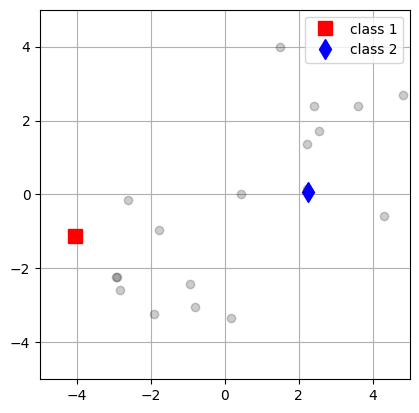

In [200]:
fig, axs = plt.subplots(1,1)

# plt.figure()
plt.plot(X_U[:,0],X_U[:,1],'ko',alpha = 0.2)

c_inds = np.where(y_L == 1)[0]
plt.plot(X_L[c_inds,0],X_L[c_inds,1],'rs',label = f'class {str(1)}',markersize = 10)
c_inds = np.where(y_L == 2)[0]
plt.plot(X_L[c_inds,0],X_L[c_inds,1],'bd',label = f'class {str(2)}',markersize = 10)

axs.set(xlim=(-5, 5), ylim=(-5, 5))
axs.set_aspect('equal', 'box')

plt.grid()
plt.legend()

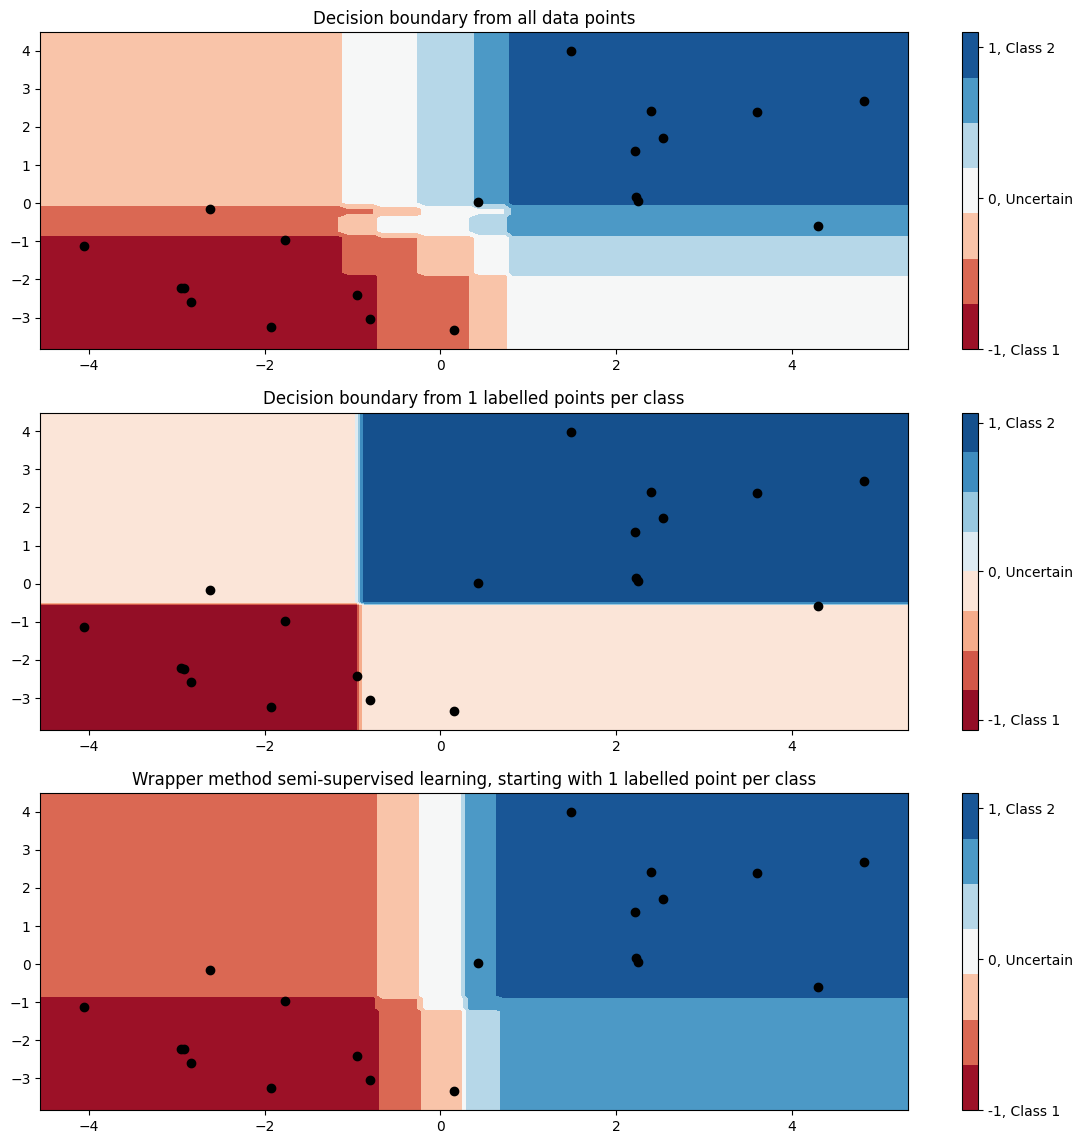

In [273]:
import matplotlib.ticker as mticker
# Show the classifier boundaries for all of these on a single plot
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 14), nrows=3)

display = DecisionBoundaryDisplay.from_estimator(classifier_A, X, cmap=cm, ax=ax1, eps=0.5)
ax1.title.set_text('Decision boundary from all data points')
ax1.plot(X[:,0],X[:,1], 'ko')

display = DecisionBoundaryDisplay.from_estimator(classifier_L, X, cmap=cm, ax=ax2, eps=0.5)
ax2.title.set_text('Decision boundary from 1 labelled points per class')
ax2.plot(X[:,0],X[:,1], 'ko')

display = DecisionBoundaryDisplay.from_estimator(classifier_PL, X, cmap=cm, ax=ax3, eps=0.5)
ax3.title.set_text('Wrapper method semi-supervised learning, starting with 1 labelled point per class')
ax3.plot(X[:,0],X[:,1], 'ko')

cbar1 = fig.colorbar(ax1.get_children()[0], ax=ax1, orientation='vertical')
cbar1.set_ticks([0, 0.5, 1], labels=['-1, Class 1', '0, Uncertain', '1, Class 2'])
cbar2 = fig.colorbar(ax2.get_children()[0], ax=ax2, orientation='vertical')
cbar2.set_ticks([0.1, 0.4, 0.7], labels=['-1, Class 1', '0, Uncertain', '1, Class 2'])
cbar3 = fig.colorbar(ax3.get_children()[0], ax=ax3, orientation='vertical')
cbar3.set_ticks([0, 0.5, 1], labels=['-1, Class 1', '0, Uncertain', '1, Class 2'])

plt.show()
